In [2]:
from generate_lib import *

In [3]:
SHOW_PLOTS = True
SAVE_PLOTS = True

In [4]:
aligned_data = list()
random_data = list()

systems = data_files[0:200]
logged_systems = ''

for file in systems:
    suffix = '_randomO'

    system_name = file.replace(suffix, '').replace('.csv', '')

    if system_name in logged_systems or (system_name + '.csv') not in systems:
        continue
    else:
        logged_systems += system_name

    (p, rp) = (None, None)

    try:
        p = os.path.join(path, system_name + '.csv')
        rp = os.path.join(path, system_name + suffix + '.csv')
    except FileNotFoundError as e:
        print(e)

        continue

    print('Appending data from {file}...'.format(file = file.replace('.csv', '')))

    d = get_data(p, skip_failed_systems = True)
    rd = get_data(rp, skip_failed_systems = True)

    if d != None and rd != None:
        random_data.append(rd)
        aligned_data.append(d)
        print('Append successful!')
    else:
        print('Append failed.')

Appending data from sysSim_0...
Append failed.
Appending data from sysSim_1...
Append successful!
Appending data from sysSim_2...
Append failed.
Appending data from sysSim_3...
Append failed.
Appending data from sysSim_4...
Append successful!
Appending data from sysSim_5...
Append successful!
Appending data from sysSim_6...
Append successful!
Appending data from sysSim_7...
Append successful!
Appending data from sysSim_8...
Append successful!
Appending data from sysSim_9...
Append successful!
Appending data from sysSim_10...
Append failed.
Appending data from sysSim_11...
Append failed.
Appending data from sysSim_12...
Append failed.
Appending data from sysSim_13...
Append failed.
Appending data from sysSim_14...
Append successful!
Appending data from sysSim_16...
Append successful!
Appending data from sysSim_17...
Append failed.
Appending data from sysSim_18...
Append successful!
Appending data from sysSim_19...
Append failed.
Appending data from sysSim_20...
Append failed.
Appending 

In [5]:
sums = {
    'random': dict(),
    'aligned': dict()
}

for d in random_data:
    key = d['max_planets']
    value = d['axes']['y']

    if key not in sums['random']:
        print('new random key: ' + str(key))

        sums['random'][key] = value
    else:
        sums['random'][key] += value

for d in aligned_data:
    key = d['max_planets']
    value = d['axes']['y']

    if key not in sums['aligned']:
        print('new aligned key: ' + str(key))

        sums['aligned'][key] = value
    else:
        sums['aligned'][key] += value

new random key: 3
new random key: 4
new random key: 5
new random key: 7
new aligned key: 3
new aligned key: 4
new aligned key: 5
new aligned key: 7


In [48]:
def save_data(idx_range, savename):
    if '.csv' not in savename:
        savename += '.csv'

    savepath = os.path.join(os.pardir, 'results', 'sum-exp-values', savename)

    data = sums['aligned']
    rdata = sums['random']
    tdata = aligned_data[0]['axes']['x']

    output = [tdata]

    keys = sorted(data.keys())

    for key in keys:
        output.append(data[key])

    for key in keys:
        output.append(rdata[key])

    output = list(np.array(output).T)

    with open(savepath, 'w', encoding = 'utf-8') as file:
        header = 'Time,'

        for key in keys:
            n = int(key)
            
            header += n_planet_prob(n) + ' (Aligned Omega),'

        for key in keys:
            n = int(key)
            
            header += n_planet_prob(n) + ' (Random Omega),'

        header += '\n'

        file.write(header)

        for idx in range(len(output)):
            line = ''
            
            for idx2 in range(len(output[idx])):
                line += str(output[idx][idx2]) + ','

            line += '\n'

            file.write(line)

In [49]:
save_data(range(30), 'sum-exp-values.csv')

In [34]:
str([0.001,1.11,0.222,3.55]).replace(']', '').replace('[', '').replace(' ', '')

'0.001,1.11,0.222,3.55'

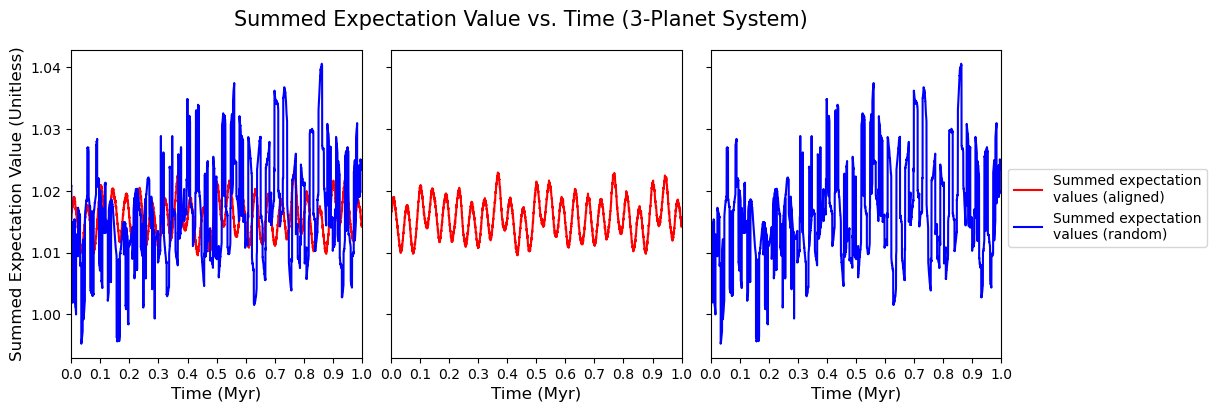

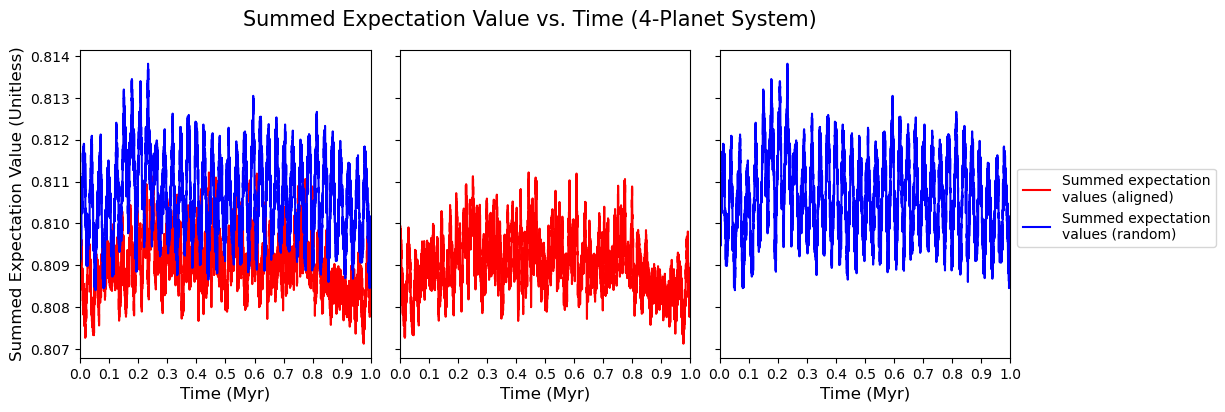

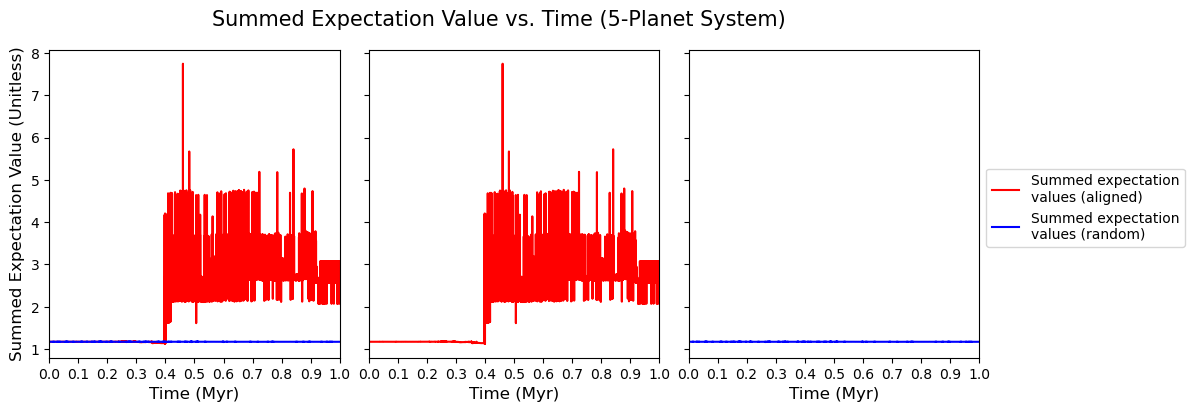

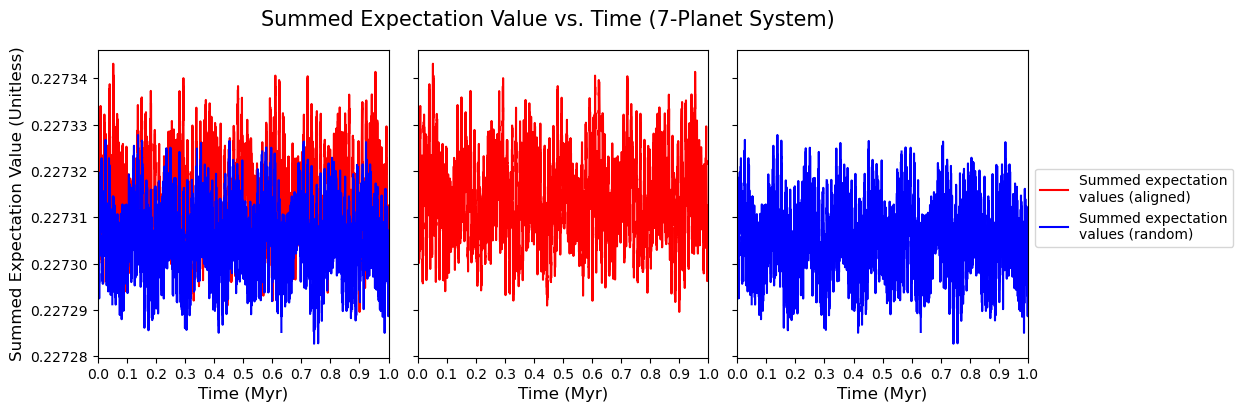

In [6]:
for key in sums['aligned']:
    if key not in sums['random']:
        raise Exception('Random and aligned do not both contain the key: {key}'.format(key = key))

    (fig, axes) = plt.subplots(1, 3, sharey = True)
    fig.set_size_inches(12, 4)

    (x, y) = (aligned_data[0]['axes']['x'], sums['aligned'][key])
    (rx, ry) = (random_data[0]['axes']['x'], sums['random'][key])

    label = '{f1}-{f2}'.format(f1 = systems[0].replace('.csv', ''), f2 = systems[-1].replace('.csv', ''))
    
    plt.subplot(1, 3, 1)
    plt.plot(x, y, color = 'red', label = 'Summed expectation\nvalues (aligned)')
    plt.plot(rx, ry, color = 'blue', label = 'Summed expectation\nvalues (random)')

    plt.subplot(1, 3, 2)
    plt.plot(x, y, color = 'red')

    plt.subplot(1, 3, 3)
    plt.plot(rx, ry, color = 'blue')

    for col in range(len(axes)):
        ax = axes[col]

        if col == 0:
            ax.set_ylabel('Summed Expectation Value (Unitless)', fontsize = 12)

        ax.set_xlabel('Time (Myr)', fontsize = 12)
        ax.xaxis.set_major_locator(tck.LinearLocator(11))
        ax.xaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos: '%.1f' % (x/1e6)))

        # Note that this does not calculate the min and max for the random cases, although they should be the same.
        xmin = np.nanmin(x)
        xmax = np.nanmax(x)

        ax.set_xlim(xmin, xmax)    

    fig.suptitle('Summed Expectation Value vs. Time ({n}-Planet System)'.format(n=key), fontsize = 15)

    fig.legend(bbox_to_anchor = (0.9, 0.6), loc = 'upper left')
    plt.subplots_adjust(wspace=0.1, hspace=0)

    if SAVE_PLOTS:
        save_path = os.path.join(os.pardir, 'results', 'sum-exp-values', 'sum-exp-values-{n}-planets'.format(n = key))
        fig.savefig(save_path, dpi = 300)

    if SHOW_PLOTS:
        plt.show()